## Importing necessary libraries

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading data

In [0]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

## Analysing both datasets

In [18]:
df_train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [19]:
df_train.info()
print(len(df_train))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB
82657


In [20]:
df_test.info()
print(len(df_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           15927 non-null  object 
 1   country             20661 non-null  object 
 2   review_title        20665 non-null  object 
 3   review_description  20665 non-null  object 
 4   designation         14676 non-null  object 
 5   points              20665 non-null  int64  
 6   price               19271 non-null  float64
 7   province            20661 non-null  object 
 8   region_1            17351 non-null  object 
 9   region_2            8914 non-null   object 
 10  winery              20665 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB
20665


Both 'review_description' and 'variety' columns in both the datasets does not contain null values

In [21]:
df_train['variety'].nunique()

28

There are 28 types of wines 

In [22]:
df_train['variety'].value_counts()


Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

'Pinot Noir' is appearing the most 

## Statistical Data of Train Dataset

In [23]:
df_train[['user_name','country','review_title','review_description','designation','province', 'region_1','region_2', 'winery', 'variety']].describe()

,user_name,country,review_title,review_description,designation,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26424,358,1019,17,13786,28
top,@vossroger,US,Korbel NV Brut Sparkling (California),This brut Cava is made entirely from the Xarel...,Reserve,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,25736,3334,7503,175,10587


##  Data Visualization

In [0]:
ms=df_train.loc[(df_train['price']>500)] #selecting those rows where price of the wine is above 900
ms=ms.loc[(ms['points']>=90)]            #selecting those rows where the ratings given to those wines are above 89

In [25]:
ms['variety'].value_counts()

Chardonnay                    14
Bordeaux-style Red Blend      13
Pinot Noir                    10
Bordeaux-style White Blend     7
Riesling                       6
Cabernet Sauvignon             3
Sangiovese                     3
Champagne Blend                2
Nebbiolo                       1
Syrah                          1
Grüner Veltliner               1
Merlot                         1
Name: variety, dtype: int64

## Selecting the top 5 type of expensive wines having the best ratings.

In [0]:
me=ms['variety'].value_counts()[:5] 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f24f0c93f28>],
      dtype=object)

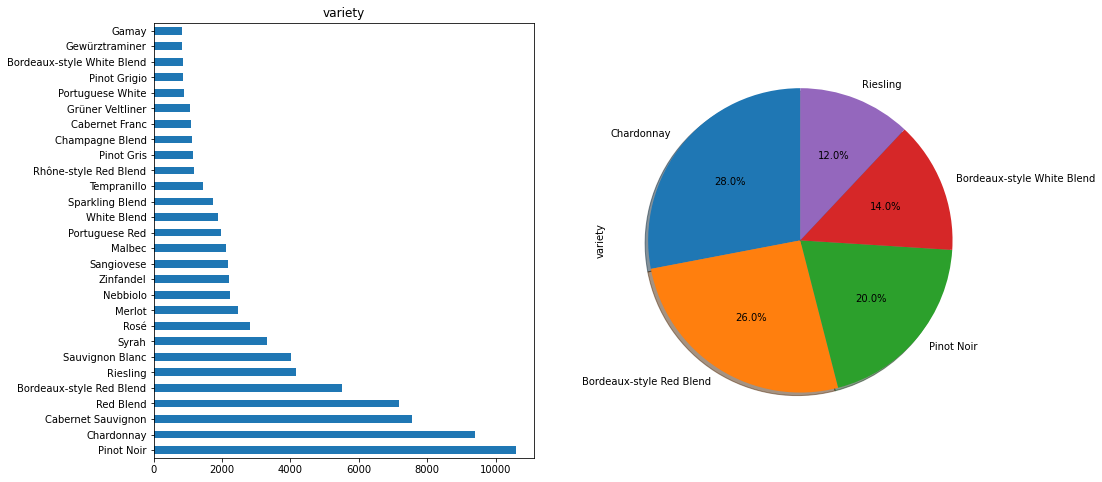

In [27]:
a=df_train['variety'].value_counts()
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
me.plot(kind='pie',subplots=True,autopct='%1.1f%%',shadow=True,startangle=90,ax=axes[1])
a.plot(kind='barh',width=0.5,subplots=True,ax=axes[0])

## Combining train and test datasets

In [0]:
df=pd.concat([df_train,df_test])

In [29]:
len(df)

103322

In [30]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


## Feature and target selection

In [0]:
y=df['variety'].values
y=y[:len(df_train)]
X=df['review_description'].values

## Label Encoding target variable

In [0]:
le=LabelEncoder()
le=le.fit_transform(y)

## Data Pre-processing
## Cleaning data-1 

In [0]:
toktok=ToktokTokenizer()
for i in range(len(X)):
    words=[]
    token=toktok.tokenize(X[i])  #Converting to tokens
    for j in token:
        j=j.lower()              #Converting each token to lower form
        if(j not in nltk.corpus.stopwords.words('english')):  #Removing stopwords
          if(j.isalpha()):       #Removing punctuations,special characters,numbers,etc and keeping only character tokens
            words.append(j)
    X[i]=" ".join(words)         

## Cleaning data-2

In [0]:
wl=WordNetLemmatizer()
for i in range(len(X)):
    review=' '.join([wl.lemmatize(j) for j in X[i].split()]) #Lemitization
    X[i]=review

## We will use data from the train dataset to train our model

## Spliting our data into training and testing data

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X[:len(df_train)], y, test_size=0.33, random_state=42)

## Transforming text to feature vectors

In [0]:
tf=TfidfVectorizer()
X_train=tf.fit_transform(X_train)
X_test=tf.transform(X_test)

## Training our model


## 1)Decision Tree

In [37]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.5043076584668402

## 2) Support Vector Machine (Linear)

In [38]:
svml=SVC(kernel='linear')
svml.fit(X_train,y_train)
svml.score(X_test,y_test)

0.670784910364043

## Support Vector Machine (Linear) is giving the best accuracy

## Classification Report for Support Vector Machine (Linear)

In [0]:
y_predict=svml.predict(X_test)

In [46]:
svml_report=classification_report(y_test,y_predict)
print(svml_report)

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.64      0.75      0.69      1881
Bordeaux-style White Blend       0.59      0.33      0.42       270
            Cabernet Franc       0.68      0.25      0.36       350
        Cabernet Sauvignon       0.54      0.75      0.63      2491
           Champagne Blend       0.78      0.51      0.62       367
                Chardonnay       0.66      0.89      0.76      3107
                     Gamay       0.78      0.44      0.56       266
            Gewürztraminer       0.77      0.53      0.63       282
          Grüner Veltliner       0.75      0.65      0.70       344
                    Malbec       0.58      0.47      0.51       719
                    Merlot       0.74      0.30      0.42       820
                  Nebbiolo       0.77      0.77      0.77       765
              Pinot Grigio       0.77      0.42      0.54       279
                Pinot Gris       0.70      0.42

## Confusion Matrix for Logistic Regression model

In [47]:
svml_cm=confusion_matrix(y_test,y_predict)
print(svml_cm)

[[1406    2   10  131    0   10    5    0    0   11   13    0    0    0
    78   78    0  118    1    1   10    0    0    0    5    0    0    2]
 [  11   88    0    0    0  111    0    3    1    0    0    0    0    0
     1    1    9    0    0    5   10    0   29    0    0    0    1    0]
 [  29    0   86  119    0    1    3    0    0    2    2    0    0    0
    58    6    0   14    0    2    5    1    2    0   13    4    0    3]
 [  77    0   10 1857    0   11    0    0    0   55   29    1    0    0
   214    1    0  105    0    0    4    3    3    0   68   23    0   30]
 [   1    1    0    0  189   87    0    0    0    0    0    0    0    1
    15    1    0    1    0    4   34    0    3   30    0    0    0    0]
 [  20    2    0   13   21 2774    0    3    4    0    0    0    4   11
    26    1    6    0    0   71    8    0   84   39    0    1   19    0]
 [  52    0    0    0    1    8  117    0    0    0    0    0    0    0
    51   25    1    0    0    0   11    0    0    0    0  

## Predicting the values of 'variety' column for test dataset using logistic regression

In [0]:
X_out=X[len(df_train):]

In [0]:
X_out=tf.transform(X_out)

In [0]:
df_test['variety']=svml.predict(X_out)

In [51]:
df_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Red Blend
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese
